<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Laboratori 5 - Enumeratius, Ramificació i Poda</h2>
</center>
</div>

In [1]:
import sys
sys.path.insert(0, '../../')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Backtracking

El <b>backtracking</b> és una tècnica d'exploració exhaustiva, és a dir, que explora tots els possibles estats d'un problema. La implementació d'un algorisme mitjançant backtracking no és gaire diferent a les estratègies de recursió que hem vist fins ara peró amb un matís important que veurem a continuació. Tots els algorismes de backtracking es caracteritzen per anar avançant fins que es pugui i, en cas d'arribar a un punt on no podem seguir explorant, <b>desfer el camí fins a l'últim punt possible</b> i explorar els següents estats.<br><br>
Un exemple per al problema de les N-Reines (N=4) el podeu veure representat en la figura següent.<br>
Observeu com inicialment es col·loca una reina a la primera casella (0,0) i, al no arribar a una solució, s'acaba movent a la posició (1,0).
<img src="https://i.imgur.com/FYu8t3s.gif" width='20%'/>


## Com programem algorismes usant backtracking?

Tot algorimse de backtracking ha de tenir, com a mínim, els següents tres blocs de codi.

<img src="img/backscheme.png" width='40%'/>

<ol>
    <li><b>Solució trobada</b>: Hem de tenir una forma de comprovar si hem arribat a una solució. En el cas que aquest sigui l'únic objectiu del problema, ja haurem acabat i simplement haurem de desfer les crides recursives.
    <li><b>Exploració</b>: Donat un estat actual, mirem quins moviments podem fer (si és que en podem fer algun!). Triem un dels moviments (seguint un criteri, o no) i cridem recursivament la funció esperant trobar una solució al problema. En el cas que el resultat d'una exploració no hagi retornat cap solució vàlida, hem de desfer el moviment que havíem fet.
    <li><b>Estat no vàlid</b>: En el cas que durant l'exploració ens trobem amb un estat que no es vàlid per seguir explorant, per exemple, no podem fer cap altre moviment i tampoc hem resolt el problema, avisem a les crides anteriors d'això per a que puguin desfer-lo.
</ol>

<div class="alert alert-success">
    <h1>Problema 1: Lights Out!</h1>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/LightsOutIllustration.svg" width='70%'>
    <p>
        Lights Out és un joc que consisteix en encendre o apagar totes les llums d'un tauler de dimensió $W\times H$ en el <b>mínim nombre de clics possibles</b>. L'objectiu d'aquest problema és una mica diferent. Donades dues configuracions de tauler (per exemple la primera i última imatge de la figura anterior), volem trobar el mínim nombre de clics que ens permeten transformar un tauler en l'altre.<br><br>
        Cada cel·la de la graella té dos estats possibles (encesa/apagada) i al fer clic sobre una cel·la es canvia l'estat d'ella mateixa i de les cel·les adjacents horitzontals i verticals com podeu veure representat també en la figura anterior.<br><br>
        Implementeu les dues funcions <b>compare_grids</b> i <b>solve_lights_out</b>. 
        <ol>
            <li>La funció <b>compare_grids</b> ha de retornar un valor de similitud entre dues graelles.
            <li>La funció <b>solve_lights_out</b> ha d'implementar estratègies de backtracking i/o ramificació i poda per tal d'optimitzar el màxim el temps d'execució. Podeu plantejar-vos també usar cues de prioritat per prioritzar l'expansió de certs estats en concret.
        </ol>        
    La classe <b>LightsOut</b> conté una sola variable, <b>grid</b> amb la representació de cada posició de la graella.<br>
    Té implementades les funcions <b>click, board_id, show_board</b> que s'expliquen a continuació.    
    </p>
    
</div>

In [2]:
from lights_out import LightsOut
import random
from matplotlib import pyplot as plt

### Generació de taulers aleatoris

In [3]:
# Generem dos configuracions aleatòries
W, H = 3,4
shuffle = 100

# Inicialitzem dos objectes amb la dimensió de la graella
a = LightsOut(W, H) # Configuració inicial
b = LightsOut(W, H) # Configuració objectiu

# Clicks aleatoris
for _ in range(shuffle ):
    i, j = random.randint(0, len(b.grid)-1), random.randint(0, len(b.grid[0])-1)
    b = b.click(i,j)
    
for _ in range(shuffle):
    i, j = random.randint(0, len(a.grid)-1), random.randint(0, len(a.grid[0])-1)
    a = a.click(i,j)

### Mostrem els dos taulells generats

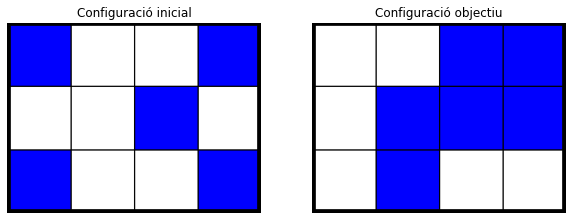

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

a.show_board(ax = axs[0])
axs[0].set_title('Configuració inicial')
b.show_board(ax = axs[1])
axs[1].set_title('Configuració objectiu')

plt.show()

### Ús de la variable 'grid' i de les funcions 'board_id()', 'click()' i 'show_board()'

In [5]:
# Podem accedir a a la graella amb la variable 'grid'
a.grid

[['X', '-', '-', 'X'], ['-', '-', 'X', '-'], ['X', '-', '-', 'X']]

In [6]:
# Podem usar un identificador únic de cada graella cridant a board_id()
a.board_id()

-5698498611553650440

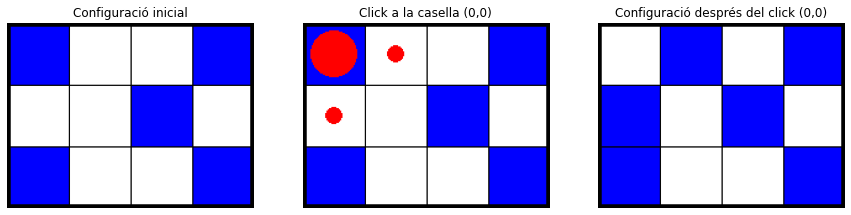

In [7]:
# Inicialitzem una figura amb tres subfigures i hi mostrem en primer lloc la configuració inicial
fig, axs = plt.subplots(1,3,figsize=(15,4))
a.show_board(ax = axs[0])
axs[0].set_title('Configuració inicial')

# Triem un punt aleatori i mostrem el click.
i, j = random.randint(0, len(a.grid)-1), random.randint(0, len(a.grid[0])-1)
a.show_board(ax = axs[1], show_click=(i,j))
axs[1].set_title(f'Click a la casella ({i},{j})')

# Executem el click i mirem el resultat
new_a = a.click(i,j)
new_a.show_board(ax = axs[2])
axs[2].set_title(f'Configuració després del click ({i},{j})')

plt.show()

In [8]:
expanded = 0
best_moves = set()
actual_moves = set()

In [9]:
from queue import PriorityQueue

def compare_grids(l1, l2):
    """
    Aquesta funció assigna una puntuació a la similitud entre l1 i l2.
    
    Params
    ======
    :l1, l2: Dos objectes de tipus LightsOut
    
    Returns
    =======
    :score: Una puntuació entre aquests dos elements.
    """
    
    l1H, l1W = len(l1.grid), len(l1.grid[0])
    l2H, l2W = len(l2.grid), len(l2.grid[0])
    
    # Vemos cuantos elementos son iguales
    score = 0
    
    if l1H != l2H or l1W != l2W:
        return -1

    for i in range(l1H):
        for j in range(l1W):
            # Si en una misma posición hay valores iguales, sumamos 1 al score
            if l1.grid[i][j] == l2.grid[i][j]:
                score += 1    
    return score

def solve_lights_out(ini, tar):
    """
    Aquesta funció soluciona el problema Lights Out i retorna una solució de moviments mínims.
    
    Params
    ======
    :ini, tar: Dos objectes de tipus LightsOut
    
    Returns
    =======
    :expanded: Número de taulers que s'han expandit
    :best_moves: La seqüència de moviments que s'han de realitzar per arribar d'un tauler a l'altre en el format [(0,0), (3,2), (1,2),...]
    """
    # Guardamos las dimensiones de la tabla
    m, n = len(ini.grid), len(ini.grid[0])
        
    # Llamamos a la función de backtracking
    solve_lights_out_backtracking(ini, tar, (m, n))
    
    # Retornamos lo que nos apetece
    return expanded, best_moves


def valid(ini, tar, point):
    global best_moves, actual_moves
    
    i, j = point
    # Hay tres condiciones que harán que un click no sea válido:
    # 1. Si la solución que estamos explorando tiene más clicks que la mejor solución encontrada.
    # 2. Si las dos casillas tienen el mismo estado
    # 3. Si ya hemos hecho click en esta casilla
    if ((best_moves and len(best_moves) < len(actual_moves)) or (ini.grid[i][j] == tar.grid[i][j]) or (point in actual_moves)):
        return False
    
    return True
    
def solve_lights_out_backtracking(ini, tar, size):
    # Definimos las variables globales
    global expanded, best_moves, actual_moves
    
    m, n = size 
    
    # Cada vez que hacemos la llamada recursiva, el expanded aumenta
    expanded += 1
    
    # Si las dos tablas son iguales, hemos encontrado la solución
    if ini.grid == tar.grid:
        return True
    
    # En caso de no haber encontrado la solución, iteramos por todas las posiciones de la tabla
    for i in range(m):
        for j in range(n):
            # Miramos si hace click en esta celda es válido
            if valid(ini, tar, (i, j)):
                # En caso de ser válido hacemos click y añadimos el click a la lista de clicks               
                actual_moves.add((i, j))
                
                # Vemos si la solución prospera
                if solve_lights_out_backtracking(ini.click(i, j), tar, size):
                    # En vez de retornar True, si la solución encontrada es mejor que la
                    # mejor solución, reasignamos variables.
                    if ((not best_moves) or (len(actual_moves) < len(best_moves))):
                        best_moves = actual_moves.copy()
                        
                # En caso que el plan no prospere, eliminamos el punto de la lista de movimientos
                actual_moves.remove((i, j))

    return False

def show_steps(ini, tar, steps):
    """
    Mostra una figura per pas donat un tauler inicial i un conjunt de passos
    
    Params
    ======
    :ini: Un objecte de la classe LightsOut amb la configuració original
    :tar: Un objecte de la classe LightsOut amb la configuració objectiu
    :steps: Una llista de passos amb el format [(0,0), (3,2), (1,2),...]
    """
    fig, axs = plt.subplots(1, len(steps)+2, figsize=(30,5))
    axs = axs.flatten()
    for i, step in enumerate(steps):
        ini.show_board(ax=axs[i], show_click=step)
        axs[i].set_title(f"Click at {step}")
        ini = ini.click(*step)
    ini.show_board(ax=axs[i+1])
    axs[i+1].set_title(f'Result after {len(steps)} steps')
    tar.show_board(ax=axs[i+2])
    axs[i+2].set_title(f'Target configuration')
    plt.show()

Proveu-ho aquí:

In [10]:
expanded, moves = solve_lights_out(a,b)

Expanded boards: 87751


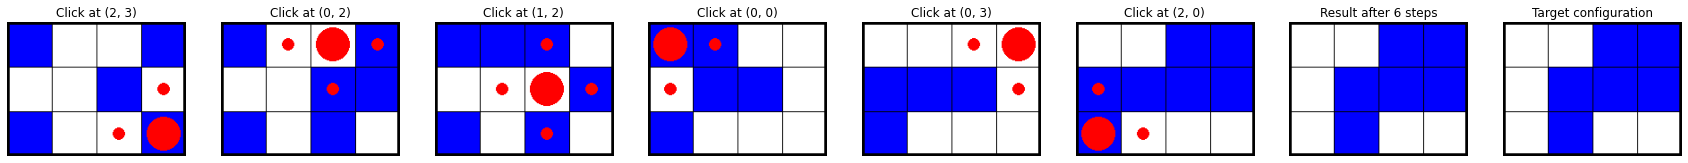

In [11]:
print('Expanded boards:',expanded)
show_steps(a, b,moves)

<div class="alert alert-success">
    <h1>Problema 2: Roomba!</h1>
    <p>
        En el nostre pis quadrat, tenim una roomba endollada a la seva base de càrrega. Volem que visiti un seguit de punts que hem embrutat i que ho faci en el menor temps possible. Si el nostre pis és de $W\times H$ cel·les i la roomba està situada inicialment a les coordenades $(x_0,y_0)$ volem trobar el menor nombre de passos possibles $p$ d'un recorregut que comenci i acabi a $(x_0,y_0)$ i que visiti tots els punts.<br><br>
        Implementeu la funció <b>solve_roomba</b> utilitzant estratègies de backtracking i ramificació i poda. Ha de retornar els taulers expandits i un camí que comenci i acabi a $(x_0,y_0)$ passant per tots els punts que es demanen. També heu d'implementar les funcions <b>inferior_bound</b> i <b>superior_bound</b> per a que retornin una cota inferior i superior, respectivament.
        <ol>
            <li><b>Cota inferior</b>: Considereu que tots els punts estan alinets horitzontalment amb la roomba. Quin seria el cost de visitar tots els punts en aquest cas?
            <li><b>Cota superior</b>: Trobeu una solució, no òptima evidentment, usant una estratègia greedy. Com a mínim ja tindrem una solució que, segurament, no serà la millor però la podrem fer servir per comparar durant l'execució del nostre algorisme.
        </ol>
        La classe <b>Roomba</b> conté quatre variables:
        <ol>
            <li><b>H, W</b>: amb les dimensions del pis.
            <li><b>origin</b>: una parella $(x_0,y_0)$ amb l'estació de càrrega de la roomba.
            <li><b>points</b>: una llista de parelles diferents entre elles $(i,j)$ amb els punts que s'han de netejar.
        </ol>
    </p>
    
</div>

In [12]:
from roomba import Roomba

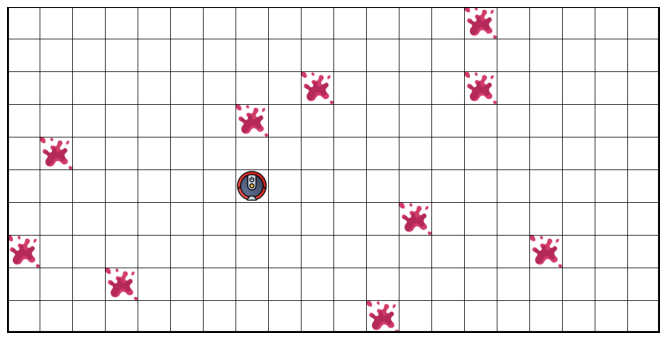

In [13]:
# Inicialitzem un tauler aleatori
H, W = 10,20
r = Roomba(H, W)
num_points = 10

points = random.sample([(i,j) for i in range(H) for j in range(W)], num_points)
origin = random.choice([(i,j) for i in range(H) for j in range(W)])
while origin in points:
    origin = random.choice([(i,j) for i in range(H) for j in range(W)])

# Afegim els punts a netejar i l'orígen
r.set_points(points)
r.set_origin(origin)

# Mostrem la graella
r.show_board()

## Distància de Manhattan
La distància de manhattan ens permet trobar la distància entre dos punts d'una graella. A diferència de la <b>distància euclidiana</b> (blava), la <b>distància de manhattan</b> (vermella) no contempla la distància en línia recta sinó que té en compte la morfologia de la grella. D'aquesta forma ens dóna una distància real entre dos punts d'una ciutat quadriculada o del taulell del problema que volem resoldre.

<img src='https://static.packt-cdn.com/products/9781787121515/graphics/bd978c4c-8251-489d-bcda-5ce7b7b825dd.png' width='20%'>

In [14]:
def manhattan_dist(point1, point2):
    """
    Donats dos punts point1, point2, retorna la distància de manhattan
    
    Params
    ======
    :point1, point2: Dos punts amb el format point1=(a1,b1), point2=(a2,b2)
    
    Returns
    =======
    :dist: La distància de manhattan entre els dos punts. dist = |a1-a2| + |b1-b2|
    
    """
    a1, b1 = point1
    a2, b2 = point2
    return abs(a1-a2)+abs(b1-b2)

In [15]:
def superior_bound(roomba):
    """
    Retorna la cota superior inicial per al problema de la Roomba usant una estratègia greedy.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba. Podeu accedir a les variables roomba.points, roomba.origin, roomba.W, roomba.H
    
    Returns
    =======
    :sup: La cota inferior incial per a aquest problema. 
    """

    # Sup guarda la distancia que hay que recorrer
    sup = 0
    
    # Roomba_pos guarda la posición actual de la roomba
    roomba_pos = roomba.origin
    
    # Uncleaned_points es una lista de los puntos que aun no hemos visitado
    dirty_points = roomba.points.copy()

    # Mientras haya puntos que no hemos visitado con la roomba
    while dirty_points:
        # En min_distance guardaremos la distancia mínima, 
        # por eso la iniciamos a un valor muy alto
        min_distance = float("inf")
        
        for point in dirty_points:
            # En dist_roomba_point guardaremos la distancia 
            # entre la roomba y un punto
            dist_roomba_point = manhattan_dist(roomba_pos, point)
            
            # Calculamos la distancia mínima
            min_distance = min(dist_roomba_point,min_distance)
            
            # Si la distancia mínima es la que hay 
            # entre la roomba y el punto, reasignamos el siguiente punto
            if min_distance == dist_roomba_point:
                next_point = point
        
        # La distancia sup será la suma de distancias mínimas
        sup += min_distance
        
        # Movemos la roomba de sitio
        roomba_pos = next_point

        # Eliminamos el punto de la lista de puntos no visitados
        dirty_points.remove(next_point)

    # Una vez visitados todos los nodos hay que volver al inicio,
    # por lo tanto calculamos la distancia desde donde estamos
    # hasta el origen.
    sup += manhattan_dist(roomba.origin, roomba_pos)
    
    return sup

def inferior_bound(roomba):
    """
    Retorna la cota inferior inicial per al problema de la Roomba. Considereu que tots els punts estan alineats i calculeu-ne el cost de visitar-los tots i tornar a la base de càrrega.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba. Podeu accedir a les variables roomba.points, roomba.origin, roomba.W, roomba.H
    
    Returns
    =======
    ::
    """
    # En caso que todos los puntos estén formando 
    # un cuadrado alrededor de la Roomba, tan solo
    # hay que hacer n + 1 moviemientos, con n la
    # cantidad de puntos.
    inf = len(roomba.points)+1
    
    return inf

In [16]:
from queue import PriorityQueue

def solve_roomba(roomba):
    """
    Soluciona el problema de trobar el camí mínim en una graella 2-Dimensional passant per un seguit de punts.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba
    
    Returns
    =======
    :expanded: Número de taulers que s'han expandit
    :best_moves: La seqüència de moviments que ha de realitzar la roomba per visitar tots els punts amb el format [(0,0), (0,1), (0,2),...,(0,0)]
    """

    # Calculamos el inferior y superior bound
    sup_bound = superior_bound(roomba)
    inf_bound = inferior_bound(roomba)
        
    # Inicializamos best moves como una lista vacía y expanded nulo
    best_moves = []
    expanded = 0
    
    # Guardamos el origen de la roomba y todos los puntos sucios
    origin = roomba.origin
    dirty_points = roomba.points
    
    # Cost y actual_moves son los parametros de la PriorityQueue()
    cost = 0
    actual_moves = [origin]
    
    # Creamos la PriorityQueue() que guarda
    # 1. Lista de movimientos actuales
    # 2. Coste de estos moviemientos
    pq = PriorityQueue()

    pq.put((actual_moves, cost))

    # Mientras haya elementos en la PriorityQueue()
    while not pq.empty():
        # El expanded aumenta en 1 y sacamos los elementos de la pq
        expanded += 1
        actual_moves, cost = pq.get()
        
        # Guardamos la última posición de la roomba
        last_pos = actual_moves[-1]        
            
        # Si hemos encontrado una solución
        if len(actual_moves) == len(dirty_points) + 1:
            # Calculamos el coste que tenemos
            dist_to_origin = cost + manhattan_dist(last_pos, origin)
            
            # Si esta solución es mejor que la que tenemos reasignamos variables
            if dist_to_origin <= sup_bound:
                sup_bound = dist_to_origin
                best_moves = actual_moves.copy()
            
        # Si no es solución, pero es una solución óptima
        elif cost < sup_bound:
            # Creamos una PriorityQueue() que guarde los puntos que aun no hemos visitado 
            # por orden de distancia
            possible_moves = next_moves(last_pos, dirty_points, set(actual_moves))

            # Mientras queden elementos en possible_moves, vemos cual es mejor
            while not possible_moves.empty():
                dist, new_pos = possible_moves.get()
                
                new_actual_moves = actual_moves.copy()
                new_actual_moves.append(new_pos)
                
                new_cost = cost + dist
                
                if new_cost < sup_bound:
                    pq.put((new_actual_moves, new_cost))

    # Al acabar añadimos el origen a best_moves
    best_moves.append(origin)
    
    # En este punto tenemos una lista con los mismos puntos que dirty_points pero ordenados de forma
    # que obtenemos la distancia mínima entre todos ellos.
    # Por eso ahora tenemos que reconstruir el camino entre los puntos, para ello llamamos a draw_path
    best_moves = draw_path(best_moves)
    
    return expanded, best_moves

In [17]:
def next_moves(last_pos, dirty_points, seen):   
    possible_moves = PriorityQueue()

    # Ordenamos los puntos sucios por cercanía
    for points in dirty_points:
        if points not in seen:
            possible_moves.put((manhattan_dist(last_pos, points), points))

    return possible_moves

In [18]:
def draw_path(path):
    # Creamos una lista donde guardaremos todo el path
    final_path = [path[-1]]
        
    # Mientras haya, almenos, 2 elementos en el path, iteramos
    while len(path) >= 2:
        # Guardamos los dos últimos elementos de path
        first_point = path[-1]
        second_point = path[-2]      
        
        # Guardamos sus coordenadas
        first_point_i, first_point_j = first_point
        second_point_i, second_point_j = second_point
        
        # Depende de cual tenga la coordenada i mayor, haremos una cosa u otra
        if first_point_i >= second_point_i:
            for i in range(first_point_i-1, second_point_i-1, -1):
                if final_path[-1] != (i, first_point_j):
                    final_path.append((i, first_point_j))
        else:
            for i in range(first_point_i+1, second_point_i+1):
                if final_path[-1] != (i, first_point_j):
                    final_path.append((i, first_point_j))
            
        # Guardamos la fila en la que estamos
        row = final_path[-1][0]
        
        # Depende de cual tenga la coordenada j mayor, haremos una cosa u otra
        if first_point_j >= second_point_j:
            for j in range(first_point_j-1, second_point_j-1, -1):
                if final_path[-1] != (row, j):
                    final_path.append((row, j))
        else:
            for j in range(first_point_j+1, second_point_j+1):
                if final_path[-1] != (row, j):
                    final_path.append((row, j))
                
        # Eliminamos el último elemento de la lista para seguir iterando
        path.pop()
    
    return final_path

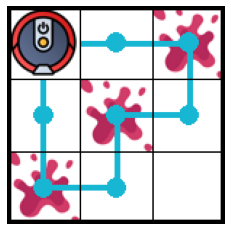

In [19]:
H, W = 3,3
r = Roomba(H, W)
r.set_origin((0,0))
r.set_points([(0,2),(1,1),(2,0)])

expanded, path = solve_roomba(r)
r.show_board(path=path)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>30 de Desembre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>L5_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>